In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [1]:
%cd yolov5


E:\object_detection\yolov5


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Feb__8_05:53:42_Coordinated_Universal_Time_2023
Cuda compilation tools, release 12.1, V12.1.66
Build cuda_12.1.r12.1/compiler.32415258_0


In [3]:
%cd ..

E:\object_detection


In [4]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [5]:
num_classes

'3'

In [6]:
with open("yolov5/models/yolov5s.yaml", 'r',encoding = 'utf') as file :
     content = file.read()
     print(content)

     

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [7]:
%pwd

'E:\\object_detection'

In [8]:
%%writefile ./yolov5/models/custom_yolov5s.yaml

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23]  # P3/8
  - [30, 61, 62, 45, 59, 119]  # P4/16
  - [116, 90, 156, 198, 373, 326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
    [-1, 3, C3, [512, False]],  # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
    [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],  # cat head P4
    [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],  # cat head P5
    [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]]  # Detect(P3, P4, P5)
  ]


Overwriting ./yolov5/models/custom_yolov5s.yaml


In [11]:
%%time
%cd ./yolov5/

[WinError 2] The system cannot find the file specified: './yolov5/'
E:\object_detection\yolov5
CPU times: total: 0 ns
Wall time: 7.69 ms


In [19]:
!python train.py --img 416 --batch 16 --epochs 10 --data E:\object_detection\data.yaml --cfg ./models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=E:\object_detection\data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-278-g050c72c Python-3.11.7 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_mo

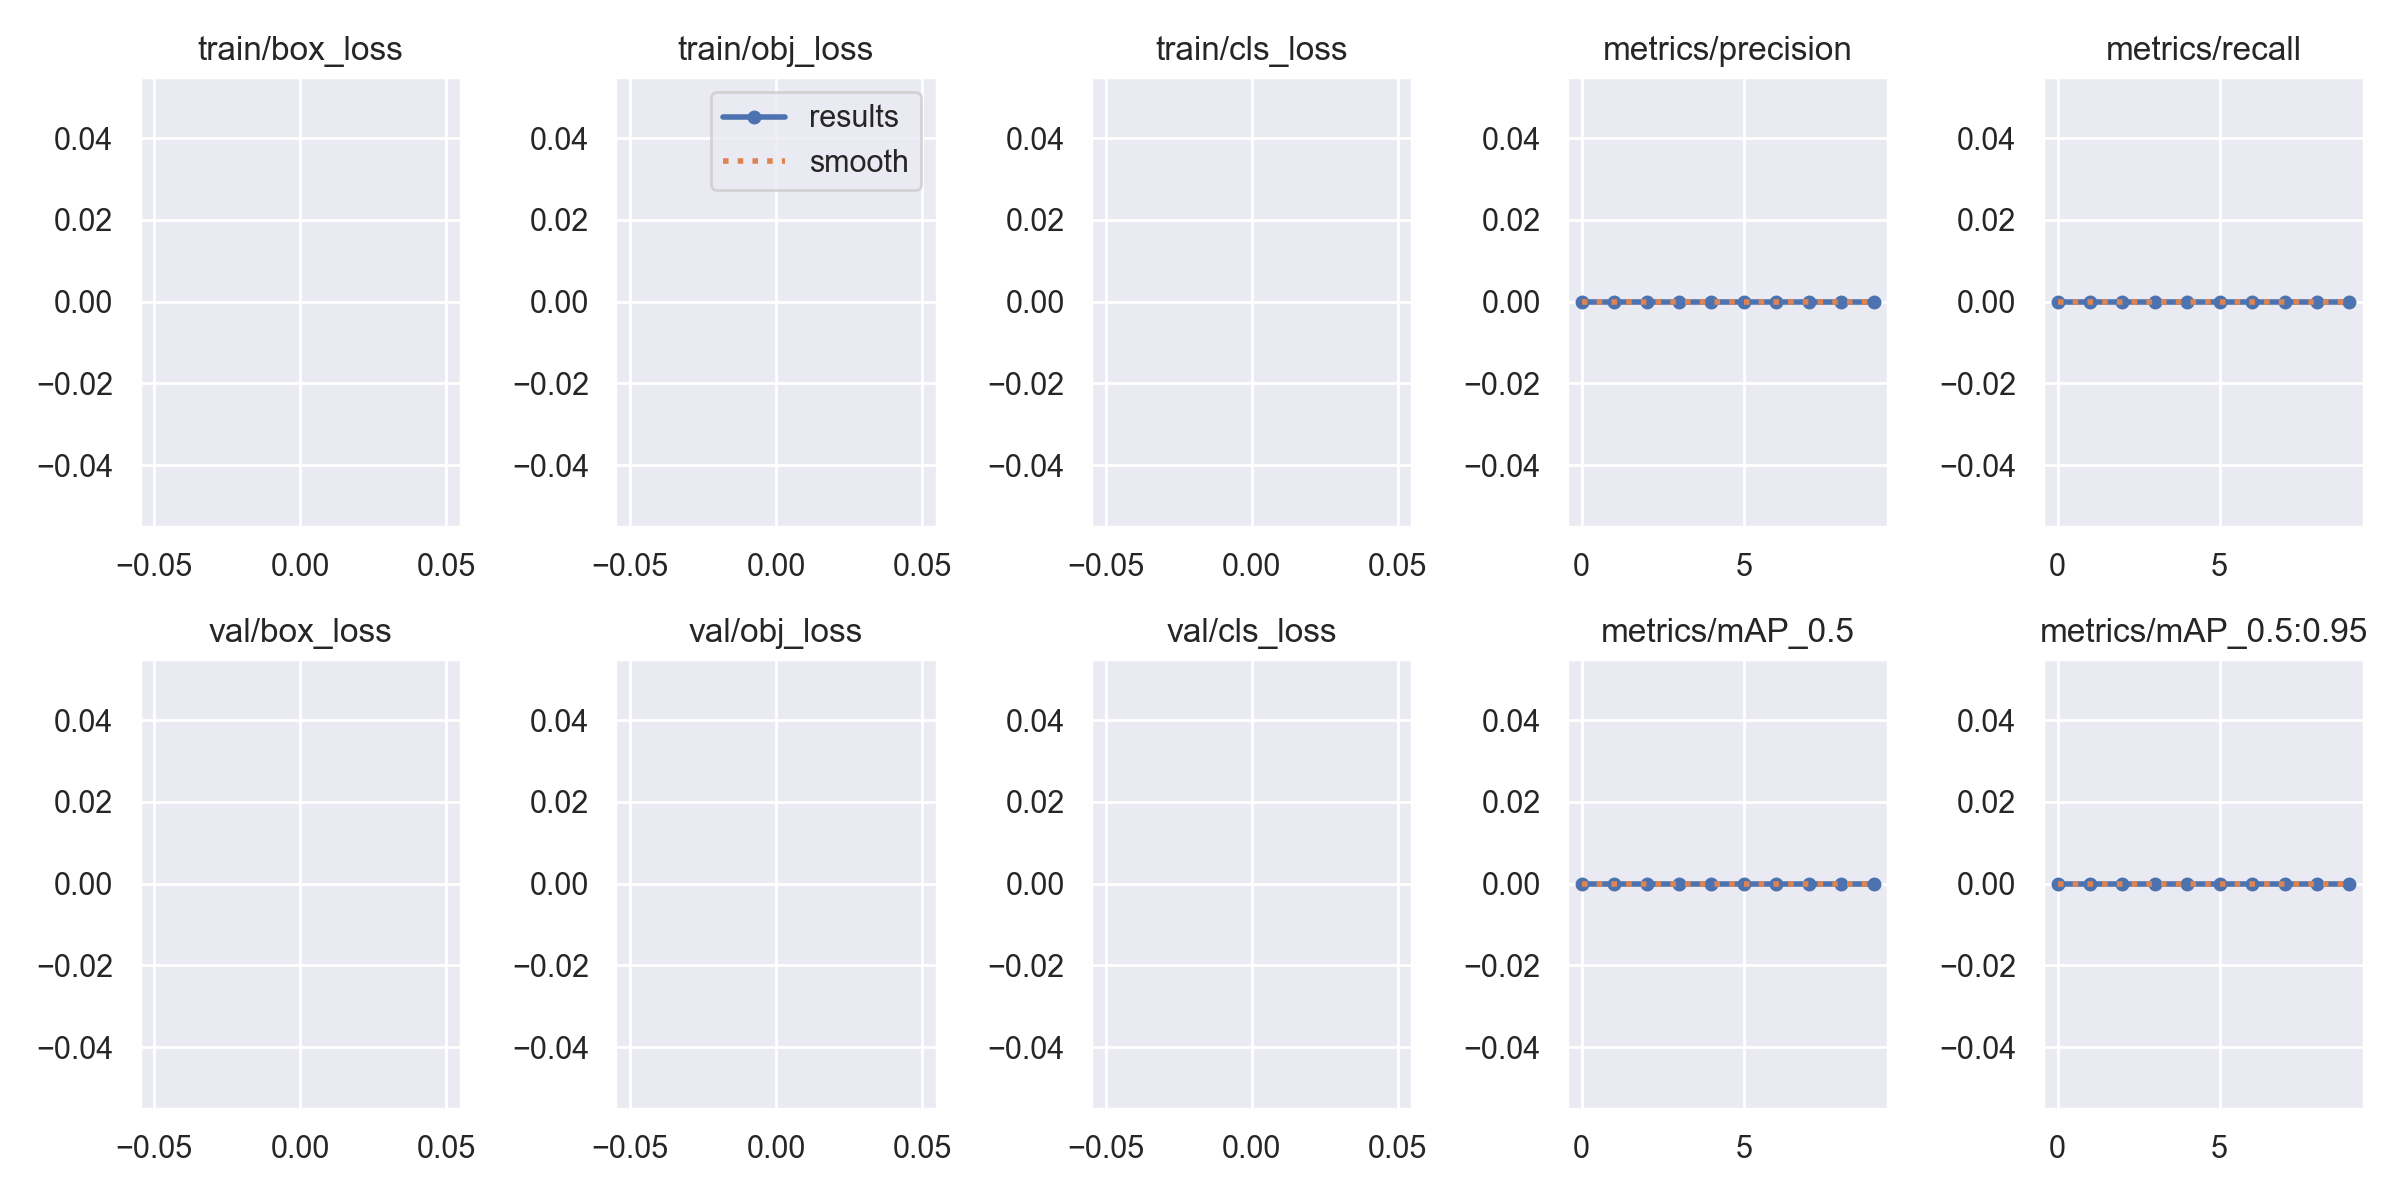

In [34]:

from IPython.display import Image

Image(filename='E:/object_detection/yolov5/runs/train/yolov5s_results2/results.png', width=1000)



GROUND TRUTH TRAINING DATA:


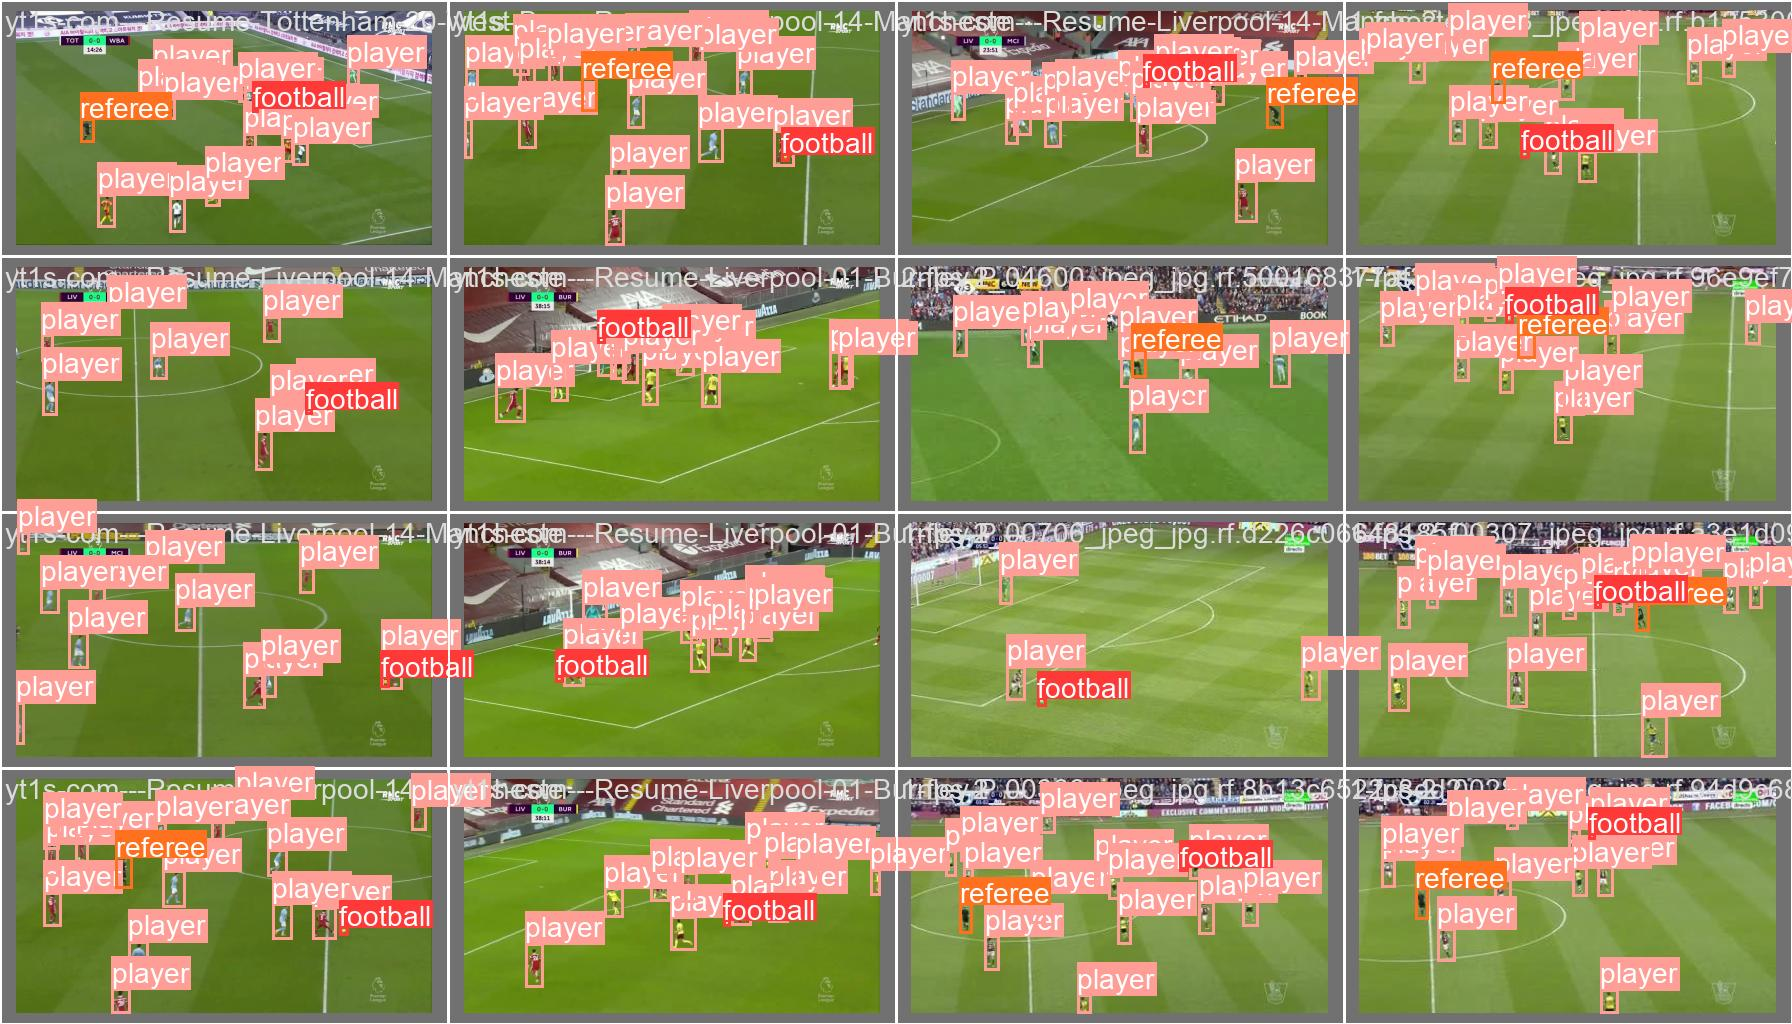

In [35]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='E:/object_detection/yolov5/runs/train/yolov5s_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


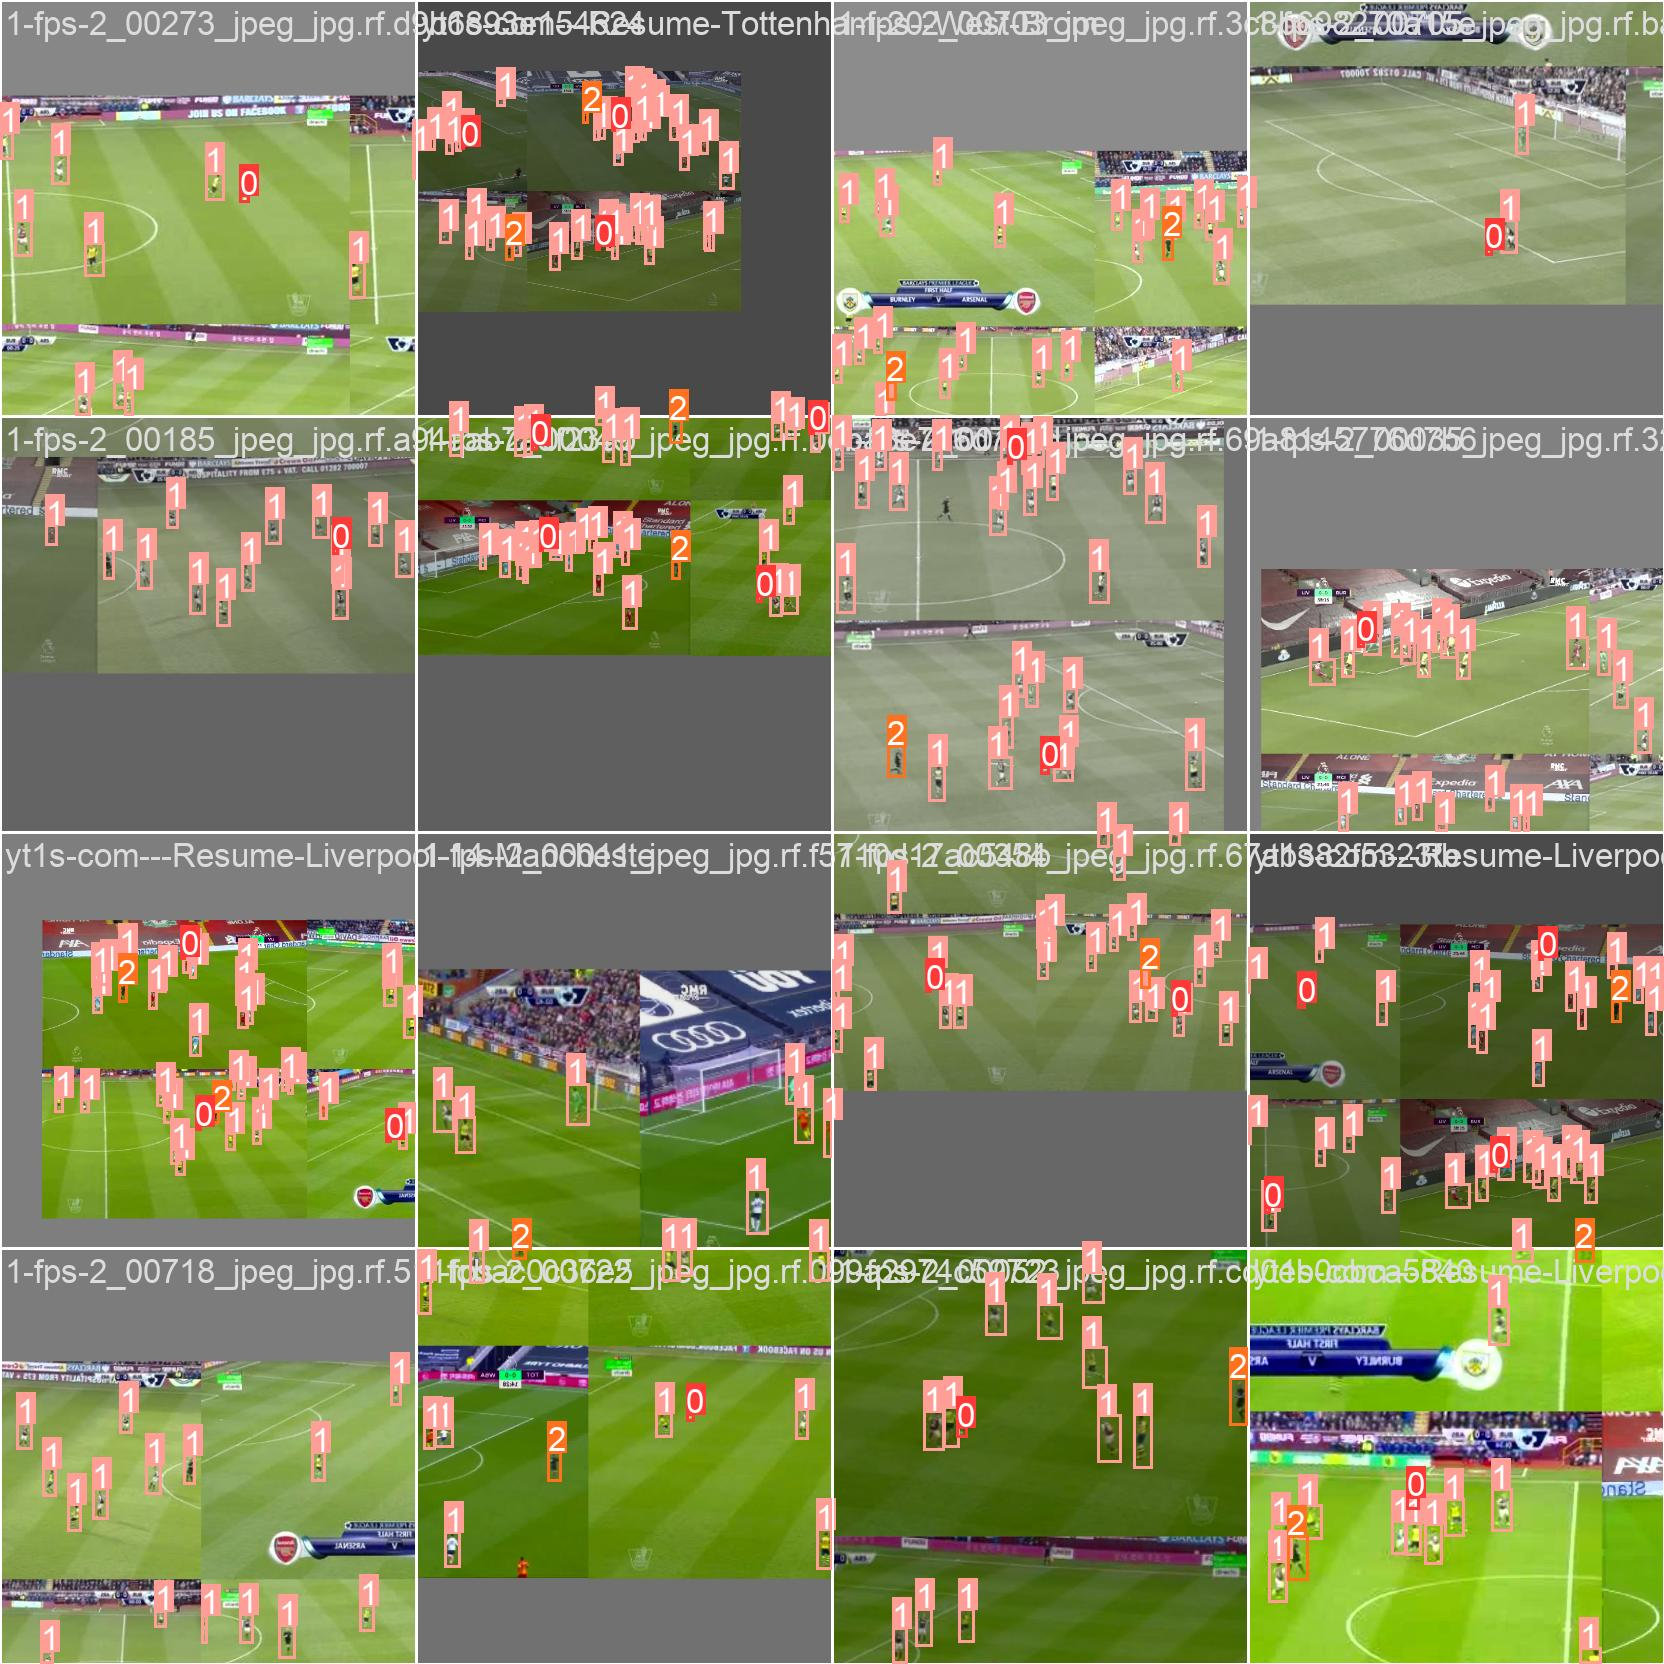

In [36]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='E:/object_detection/yolov5/runs/train/yolov5s_results2/train_batch0.jpg', width=900)

In [42]:
%ls E:/object_detection/yolov5runs/train/yolov5s_results2/weights

Parameter format not correct - "bject_detection".


In [31]:
%ls runs/ train

Parameter format not correct - "rain".


In [44]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd E:/object_detection/yolov5


E:\object_detection\yolov5


In [45]:
!python detect.py --weights runs/train/yolov5s_results2/weights/best.pt --img 416 --conf 0.5 --source E:/object_detection/test/images

detect: weights=['runs/train/yolov5s_results2/weights/best.pt'], source=E:/object_detection/test/images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-278-g050c72c Python-3.11.7 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)

Fusing layers... 
custom_YOLOv5s summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/16 E:\object_detection\test\images\1-fps-2_00001_jpeg_jpg.rf.03aa7dfbdbc3d0a5482ea68a7f9a8a8d.jpg: 256x416 (no detections), 39.1ms
image 2/16 E:\object_detection\test\images\1-fps-2_00014_jpeg_jpg.rf.2d7d526c69632431e3d987a764cbd4e1.jpg: 256x416 (no detections), 10.0ms
image 3